In [1]:
#Question 1
import pandas as pd
guns = pd.read_csv('guns.csv')

#getting the number of students who atleast graduated from college
atleast_college = ((guns.education == 4) & (guns.sex == 'F'))
atleast_college = guns[atleast_college]
print("Number of female victims that graduated from college:" + str(atleast_college.education.count()))

Number of female victims that graduated from college:2346


In [2]:
#Question 2
import matplotlib.pyplot as plt
import seaborn as sns

#The total number of males that died by gun-related suicide
males = (guns.sex == 'M')  & (guns.intent == 'Suicide')
males = guns[males]
males = males.sex.count()
#The total number of females that died by gun-related suicide
females = (guns.sex == 'F') & (guns.intent == 'Suicide')
females = guns[females]
females = females.sex.count()

#setting the x and y variables for the bar chart
x = ["Males", "Females"]
y = [males, females]

bar = plt.bar(x, y)
#indicating the values for total males and females
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

sns.set_style("darkgrid")
plt.title("TOTAL NUMBER OF MALES VS FEMALES WHO DIED BY GUN-RELATED SUICIDE(2012-2014)")
plt.show()

<Figure size 640x480 with 1 Axes>

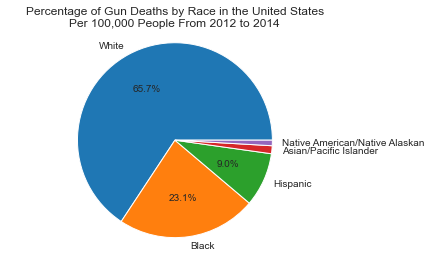

In [3]:
#Question 3
#creating dataframe with deaths for each race
deaths = guns.groupby('race').size().to_frame()

#resetting the deaths dataframe index
deaths = deaths.reset_index()

#changing the column names
deaths = deaths.rename(columns = {"race":"Race",0:"Values"}, errors = "raise")

#sorting the values in descending order
deaths = deaths.sort_values(by = 'Values', ascending = False)

#function to extract only percentages greater than 8%
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 8 else ''

#create piechart
plt.pie(deaths.Values, labels = deaths.Race, autopct = my_autopct)

#adding multiline title using \n and r
plt.title('Percentage of Gun Deaths by Race in the United States\n' + r'Per 100,000 People From 2012 to 2014')
plt.axis('equal')
plt.show()

In [1]:
#Question 4
#creating dataframe intent
intent = guns.groupby('intent').size().to_frame()

#resetting the intent dataframe index
intent = intent.reset_index()

#changing the column names
intent = intent.rename(columns = {"intent":"Intent",0:"Values"}, errors = "raise")

#sorting the values in descending order
intent = intent.sort_values(by = 'Values', ascending = False)

#plotting using seaborn
ax = sns.barplot(y="Intent", x="Values", data=intent,palette='magma')
ax.set_title('Total Gun Deaths in the US from 2012-2014')
ax.set_xlabel('')
plt.show()

NameError: name 'guns' is not defined

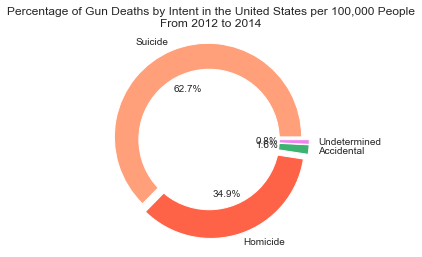

In [7]:
#Question 5
colors = ['lightsalmon', 'tomato', 'mediumseagreen', 'violet']
explode = (0.03, 0.06, 0.07, 0.07)  # explode a slice if required

plt.pie(intent.Values, explode=explode, labels=intent.Intent,
        autopct='%1.1f%%',pctdistance=0.55, colors=colors)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Gun Deaths by Intent in the United States per 100,000 People\n' + r'From 2012 to 2014')
plt.show()  